# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Import the dataset

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Check for null values

In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Preprocessing

In [5]:
data=data.drop(labels=['Unnamed: 32','id'],axis=1)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


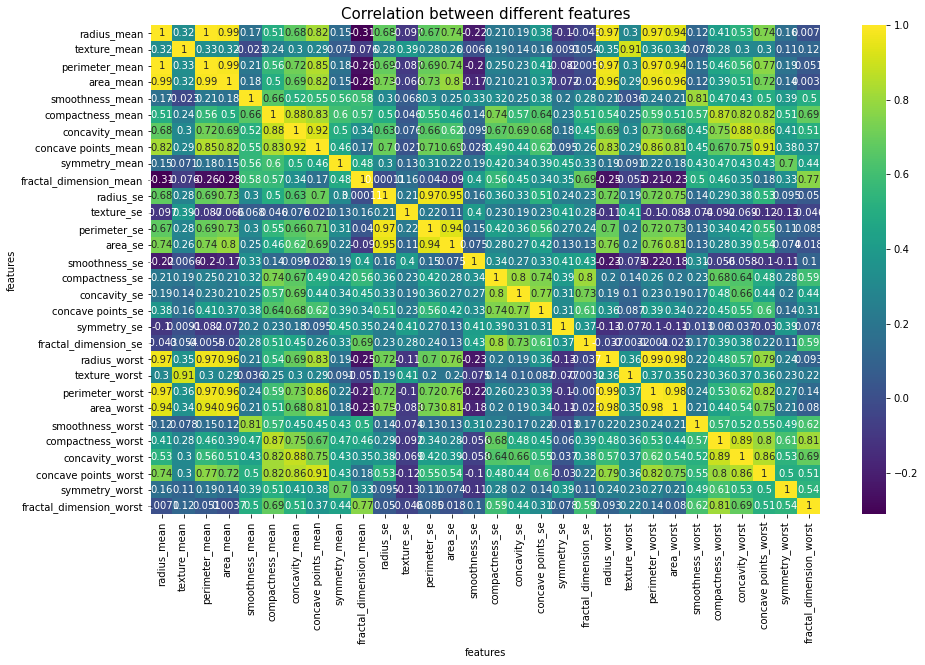

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()


In [8]:
data=data.sample(frac=1)

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
518,B,12.880,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,...,15.05,24.37,99.31,674.7,0.14560,0.2961,0.1246,0.10960,0.2582,0.08893
325,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,...,13.71,21.10,88.70,574.4,0.13840,0.1212,0.1020,0.05602,0.2688,0.06888
410,B,11.360,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
459,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,...,10.67,36.92,68.03,349.9,0.11100,0.1109,0.0719,0.04866,0.2321,0.07211
397,B,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053


In [10]:
#Shuffle the dataset
data=data.sample(frac=1)

In [11]:
data_values=data.columns
data_values=data_values.drop(labels='diagnosis')
data_values

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Data Normalization

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
data[data_values]=scaler.fit_transform(data[data_values])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,B,0.214350,0.480893,0.212356,0.110286,0.360928,0.253727,0.260544,0.204026,0.165657,...,0.161864,0.670043,0.158723,0.071028,0.387176,0.217724,0.289936,0.331718,0.107826,0.211728
500,B,0.381419,0.237741,0.379656,0.231559,0.417080,0.358935,0.180904,0.305268,0.307071,...,0.314123,0.224147,0.295284,0.165086,0.279535,0.184640,0.148243,0.349828,0.120639,0.199725
152,B,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778
272,M,0.698992,0.381468,0.715293,0.571580,0.373567,0.542053,0.514292,0.540755,0.333838,...,0.720740,0.430704,0.724588,0.540405,0.370006,0.431945,0.463818,0.632646,0.249951,0.219992
14,M,0.319419,0.436253,0.344206,0.184433,0.545906,0.643887,0.498594,0.398857,0.509596,...,0.252579,0.532783,0.290801,0.125959,0.620287,0.723006,0.554553,0.758763,0.400355,0.577594


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['diagnosis']
data['diagnosis']=le.fit_transform(data['diagnosis'])
# data.head()

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,0,0.214350,0.480893,0.212356,0.110286,0.360928,0.253727,0.260544,0.204026,0.165657,...,0.161864,0.670043,0.158723,0.071028,0.387176,0.217724,0.289936,0.331718,0.107826,0.211728
500,0,0.381419,0.237741,0.379656,0.231559,0.417080,0.358935,0.180904,0.305268,0.307071,...,0.314123,0.224147,0.295284,0.165086,0.279535,0.184640,0.148243,0.349828,0.120639,0.199725
152,0,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778
272,1,0.698992,0.381468,0.715293,0.571580,0.373567,0.542053,0.514292,0.540755,0.333838,...,0.720740,0.430704,0.724588,0.540405,0.370006,0.431945,0.463818,0.632646,0.249951,0.219992
14,1,0.319419,0.436253,0.344206,0.184433,0.545906,0.643887,0.498594,0.398857,0.509596,...,0.252579,0.532783,0.290801,0.125959,0.620287,0.723006,0.554553,0.758763,0.400355,0.577594


# Build the Model

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [16]:
model=Sequential([
    Dense(units=16,input_shape=(30,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,106
Trainable params: 1,106
Non-trainable params: 0
_________________________________________________________________


Intialize the loss function, optimizer, metrics

In [18]:
model.compile(optimizer=Adam(learning_rate=0.002),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Split the Dataset

In [19]:
features=data.drop(labels='diagnosis',axis=1)
target=data.drop(labels=data_values,axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

Train the Model

In [20]:
model.fit(x=x_train,y=y_train,validation_split=0.1,batch_size=10,shuffle=True,epochs=30,verbose=2)

Epoch 1/30
41/41 - 1s - loss: 0.5591 - accuracy: 0.7604 - val_loss: 0.3930 - val_accuracy: 0.9565 - 1s/epoch - 34ms/step
Epoch 2/30
41/41 - 0s - loss: 0.3341 - accuracy: 0.9340 - val_loss: 0.1783 - val_accuracy: 0.9783 - 82ms/epoch - 2ms/step
Epoch 3/30
41/41 - 0s - loss: 0.2206 - accuracy: 0.9218 - val_loss: 0.1403 - val_accuracy: 0.9348 - 78ms/epoch - 2ms/step
Epoch 4/30
41/41 - 0s - loss: 0.1668 - accuracy: 0.9438 - val_loss: 0.1038 - val_accuracy: 0.9783 - 87ms/epoch - 2ms/step
Epoch 5/30
41/41 - 0s - loss: 0.1617 - accuracy: 0.9340 - val_loss: 0.0742 - val_accuracy: 0.9783 - 84ms/epoch - 2ms/step
Epoch 6/30
41/41 - 0s - loss: 0.1320 - accuracy: 0.9584 - val_loss: 0.1181 - val_accuracy: 0.9348 - 82ms/epoch - 2ms/step
Epoch 7/30
41/41 - 0s - loss: 0.1335 - accuracy: 0.9511 - val_loss: 0.0586 - val_accuracy: 0.9783 - 80ms/epoch - 2ms/step
Epoch 8/30
41/41 - 0s - loss: 0.1122 - accuracy: 0.9658 - val_loss: 0.0593 - val_accuracy: 0.9783 - 83ms/epoch - 2ms/step
Epoch 9/30
41/41 - 0s - l

# Test the Model

In [21]:
predictions=model.predict(
    x=x_test,
    batch_size=10,
    verbose=0
)

In [22]:
round_predictions=np.argmax(predictions,axis=-1)
print(round_predictions[:5])

[0 1 1 0 0]


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,round_predictions))

0.9736842105263158


# Confusion Matrix

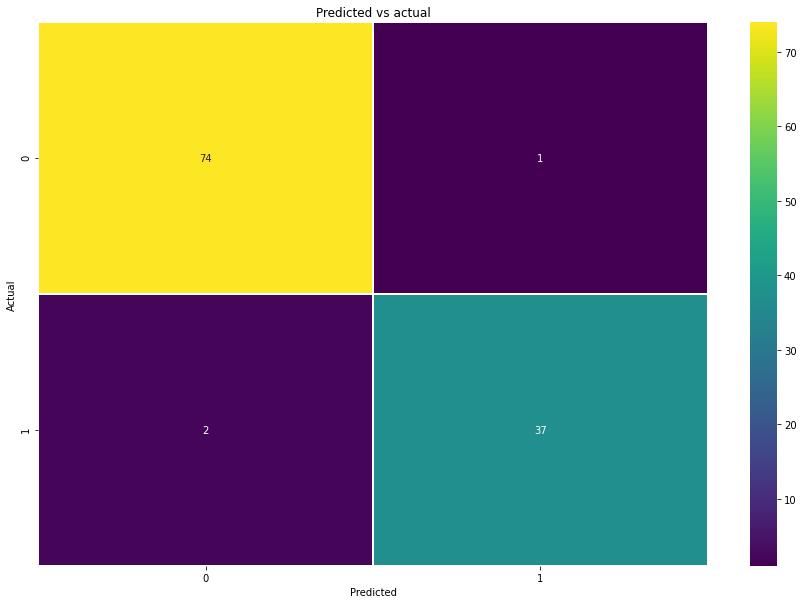

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,round_predictions)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()